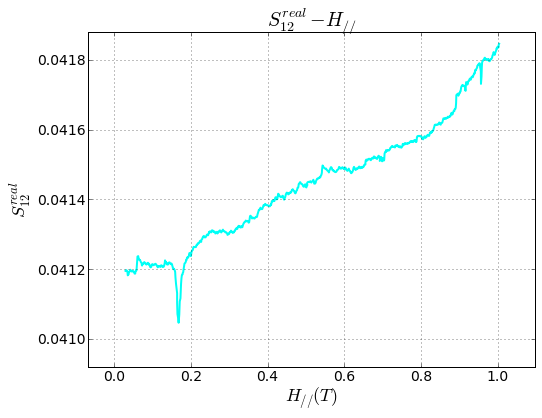

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import os
%matplotlib inline
# ===================

N = 2
colors = cm.hsv(np.linspace(0, 1, N + 1))

# move to the target folder
path = '/Users/yiyi/Desktop/Final_v3/STT5438_'
os.chdir(path)

frequency = 12

suf = "000MHz"
filename = str(frequency)+suf
fileformat = '_' + str(frequency) + '000MHz.dat'

i = 0
fig = plt.figure(figsize = (8, 6), facecolor='white')
fontTitle = 20
fontLabel = 18
fontAxis = 14

for file in os.listdir('.'):
    if file.endswith(fileformat):
        f = file
        # Load data files into x, y

        rawdata = []
        for line in open(f, 'r').readlines():
            rawdata.append(line.split())

        
        del rawdata[len(rawdata)-1]  # remove last data point

        # 1 --> H, 6 --> S12_real, 7 --> S12_imag
        indexH = 1
        indexS12_real = 6
        indexS12_imag = 7
        H = []
        S12_real = []
        S12_imag = []
        
        for element in rawdata[:]:
            H.append(element[indexH])
            S12_real.append(element[indexS12_real])
            S12_imag.append(element[indexS12_imag])
        x = H
        y_real = S12_real
        y_imag = S12_imag
        
        # Plot out x-y
        xlabelname = r'$H_{//}(T)$'
        ylabelname = r'$S_{12}^{real}$'
        titlename = r'$S_{12}^{real}-H_{//}$'
        
        xlabelname_imag = r'$H_{//}(T)$'
        ylabelname_imag = r'$S_{12}^{imag}$'
        titlename_imag = r'$S_{12}^{imag}-H_{//}$'

        ax = fig.add_subplot(111)
        rc('font', size=fontAxis)
        
        plt.hold(True)
        lines = plt.plot(x, y_real)
        plt.setp(lines, color=colors[i+1], linewidth=2.0)

        plt.setp(lines, color=colors[i+1], linewidth=2.0)
        plt.xlabel(xlabelname, fontsize=fontLabel, fontweight='bold')
        plt.ylabel(ylabelname, fontsize=fontLabel, fontweight='bold')
        plt.title(titlename, fontsize=fontTitle, fontweight='bold')
        plt.grid(True)
        plt.hold(True)

        xmin = round(float(min(x)), 2)
        xmax = round(float(max(x)), 2)
        ymin = round(float(min(y_real)), 4)
        ymax = round(float(max(y_real)), 4)

        ax.set_xlim(xmin-(xmax-xmin)*0.1, xmax+(xmax-xmin)*0.1)
        ax.set_ylim(ymin - (ymax - ymin) * 0.1, ymax + (ymax - ymin) * 0.1)
        i = i + 1

plt.show()